# Some theoretical questions

## Exercise: Comparing MSE and RMSE

Given the following set of true values and predicted values from a regression model:

**True values :**  

$y_i$ = [500, 300, 800, 400, 6000]

**Predicted values :** 

$\hat{y_i}$ = [450, 350, 780, 420, 910]

The MSE for the given dataset is 5 182 780. This result indicates a significant difference between predicted outcome and the actual data. To be more precise, it means that the true value points are scattered widely around the regression line on the illustrating graph. The disadvantages of MSE include: 
1) Sensitivity to the outliers. In our case, the difference between 

1. Calculate on paper the **Mean Squared Error (MSE)** for this set of true and predicted values. 

   The formula for MSE is:  
   MSE = $\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2$, where n is the number of data points.

2. What does the result quantify ? Explain with your own words.

3. What are the disadvantages of this metric ?

Answer: The MSE for the following set is 5 182 780. It indicates a considerable difference between the predicted outcome and true values. To be more precise, it means that the true value points are widely scattered between the regression line on a graph. The disadvantages of MSE include:
1) Sensitivity to outliers. In our case, the difference between true y5 and predicted y5 contributed significantly into high MSE.
2) It does not provide any specific details about errors occurring. You won’t be able to understand if the predicted values are bigger or smaller than true ones.

4. Calculate the **Root Mean Squared Error (RMSE)** for the same values.

   The formula for RMSE is:

   RMSE = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2} = \sqrt{MSE}$

5. Interprete the results.

6. What is the difference with MSE ? How does it make it "better" ? In your opinion, why is the RMSE generally preferred in some situations over MSE ?

Answer: The RMSE for the given set is 2276,57. We can interpet it as an average distance between predicted values and true values. 
There are some reasons why RMSE can be better than MSE in some situations:
The RMSE is in the same units as the given data, which makes it more convenient than MSE. It is still sensitive to the outliers, but not so mush as MSE. It emphasises large errors rather than small ones. 

## Exercise: Bias Variance decomposition of MSE 

Given a model $\hat{f}(X)$ that predicts a value based on some input data, and the true value $Y$, prove that the **Mean Squared Error (MSE)** can be decomposed into two components: **Bias** and **Variance**, i.e. $\text{MSE} = \mathbb{E}[(\hat{Y} - Y)^2] = (\text{Bias}(\hat{Y}))^2 + \text{Var}(\hat{Y}) $

Where:
- **Bias** is the difference between the expected prediction and the true value, i.e., $\text{Bias} = \mathbb{E}[\hat{Y}] - Y$.
- **Variance** is the expected squared deviation of the predicted value from the expected predicted value, i.e., $\text{Variance} = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2]$.


Hints:
- Use the identity : $(\hat{Y} - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + (\mathbb{E}[\hat{Y}] - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + \text{Bias}(\hat{Y})$
- Start by expanding the expression $(\hat{Y} - Y)^2$ to isolate the terms involving $\hat{Y}$ and $Y$.

# Coding exercise

In this exercise, we will train a model to predict price of cars (column 'selling_price'), using other features in the dataset.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # you can also use seaborn if you prefer
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Import the other necessary library here


In [12]:
# import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)

### 1. Analyse your dataset. How many features and columns do we have ?

In [14]:
# Print a summary for our dataset
df.info()

# The number of columns in the dataset is 12 and the number of features is 11.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


### 2. What categorical variables are ordinal or nominal ? Encode them using OHE and Label encoder from SKLearn. 

In [16]:
# Nominal variables: name, fuel, seller_type, transmission
# Ordinal variables: seats, owner
# Other variables are continuous, so they are neither ordinal, nor nominal

# We will use OHE to encode nominal data
# Let's also transform our encoded data into a pandas dataframe by using .set_output(transform='pandas')
# It will be convenient for concatenating encoded nominal data with the rest of dataset

ohe_encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

# Encoding our data with OHE encoder from Sklearn
nominal_cols = ['name', 'fuel', 'seller_type', 'transmission']
ohe_encoded_cols = ohe_encoder.fit_transform(df[nominal_cols])

# Let's create a copy of our dataframe, put encoded data to it and remove uncoded columns
df_encoded = pd.concat([df, ohe_encoded_cols], axis=1).drop(columns=nominal_cols)

# Will use Label Encoding to encode ordinal data
label_encoder = LabelEncoder()
ordinal_cols = ['seats', 'owner'] 

# Encoding each ordinal column using a for cycle
for col in ordinal_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

### 3. Plot the distributions of Year, km_driven and mileage data. What could be a problem for convergence ?

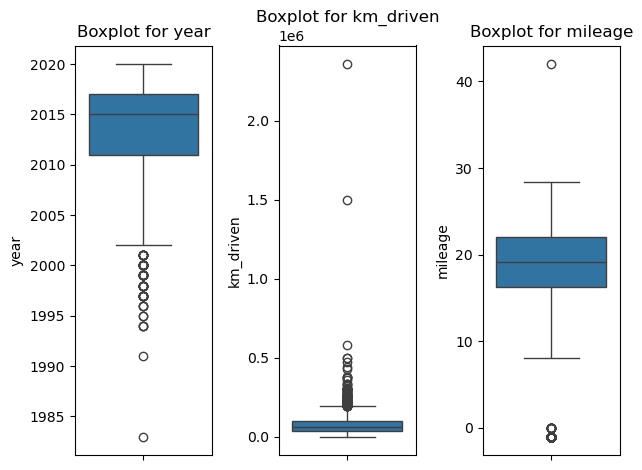

In [18]:
# Plotting the distribution of year, km_driven, mileage data

def draw_box_plots(df):
    quantitive_cols = ['year', 'km_driven', 'mileage']

    # Let's put 3 boxes on 1 plot
    fig, axes = plt.subplots(1, 3)
    
    axes = axes.flatten()
    
    for i, column in enumerate(quantitive_cols):
        sns.boxplot(data=df[column], ax=axes[i])
        axes[i].set_title(f"Boxplot for {column}")
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.draw()
    plt.show()

draw_box_plots(df)

The problem for convergence is presence of outliers, which may cause mistakes in generalizations and predictions of a model.

### 4. Scale those three numerical features, use whatever scaler you want (but use the SKLearn scalers)

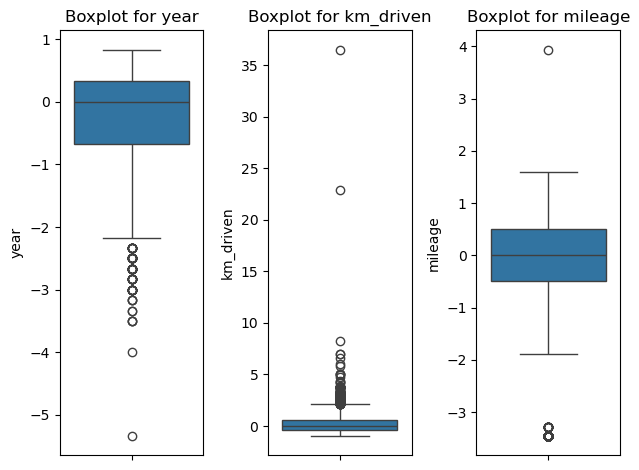

In [21]:
# We will use Robust Scaler from SkLearn, because it is the best option to manage with the outliers
scaler = RobustScaler() 

columns_to_scale = ['year', 'km_driven', 'mileage']

# Let's scale the columns and plot the result
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])
draw_box_plots(df_encoded)

### 5. Select Features and Target Variable
Separate X's to y in two different datasets

In [23]:
# We have to split our dataset to X's and y, so we will use iloc
x = df_encoded.iloc[:,list(range(20)).pop(1)] # We save all the columns except the 'selling_price' column to x variable
y = df_encoded.iloc[:,[1]] # y is for the 'selling_price' column

### 6. Plot the distribution of the Target variable 

 You can us matplotlib or seaborn libraries


<Figure size 640x480 with 0 Axes>

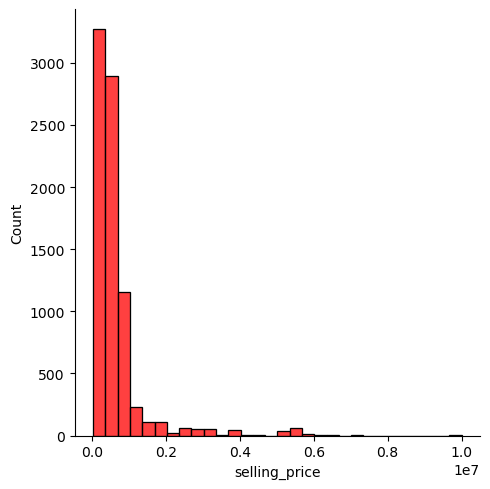

In [25]:
# Plotting the distribution of selling_price using a histogram chart without kernel density estimation
plt.figure() 
sns.displot(df['selling_price'], kde=False, color='red', bins=30)
plt.show()

### 7. Split the Data
Use to SKLearn built-in function ```train_test_split()``` to split the dataset into training and testing sets. 

You should then have four dataset, X_train, X_test, y_train and y_test.

In [27]:
# We will shuffle data to split it randomly
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True)

# To use the data with GBR we have to turn it to 1d and 2d numpy arrays
y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)


### 8. Train a Gradient Boosting Model

The following code trains an ensemble Model. The class ```GradientBoostingRegressor(*params)```  setup the model and the function ```fit(X_train, y_train)``` trains and fits it.
- Use the function ```Predict()``` to predict y, both with your train and test datasets. (have a look at SKlearn documentation to use it)
- Compute the train and test Mean Squared Errors.


In [29]:
n = 10 # number of estimators (relative to model complexity)

gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
gbr.fit(X_train, y_train) # Training the model

y_train_pred = gbr.predict(X_train) # Predicting train values
y_test_pred = gbr.predict(X_test) # Predicting test values

# Counting train and test MSE's with inbuilt sklearn function
MSE_train = mean_squared_error(y_train, y_train_pred) 
MSE_test = mean_squared_error(y_test, y_test_pred)

### 9 : Increase the model complexity

Train your model in a loop that increase the parameter ```n```. Start at n = 10 to n = 5000 and step = 500 (otherwise your code will run for hours).

At each iterations : 
- reset the model
- train the model
- predict values using X_train
- compute the MSE of training and testing sets.
- store the new mse in a list

In [52]:
# In these two lists we will contain the MSE's values, so we can build a graph after training the model
MSE_train_list = []
MSE_test_list = []
n_range = range(10, 5000, 500)

# We will train a model in a loop, increasing n by 500 each time
for n in n_range:
    # Restarting the model by reinitializing it
    gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9)

    # Training the model
    gbr.fit(X_train, y_train)

    # Predicting outcomes for train and test sets
    y_train_pred = gbr.predict(X_train)
    y_test_pred = gbr.predict(X_test)

    # Counting train and test MSE's and adding them to the lists
    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    MSE_train_list.append(MSE_train)
    MSE_test_list.append(MSE_test)    

### 10 : In one figure, plot both train and test MSE evolution, with respect to the model complexity (i.e. n) 

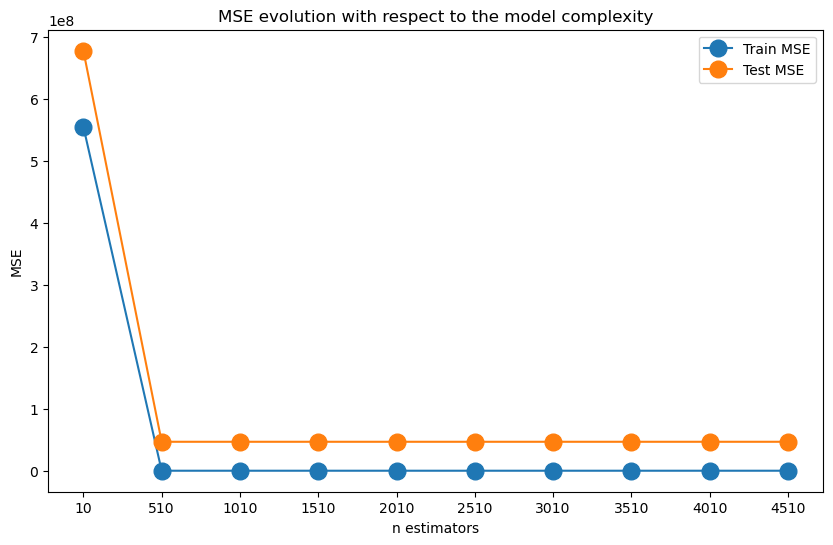

In [54]:
# Converting the range of n values to use it with matplotlib functions
n_range_np = np.array(n_range)

# Defining the size of a graph
plt.figure(figsize=(10, 6))

# To provide a more clear representation of MSE evolution adding ticks to the x-axis 
plt.xticks(n_range)

# Plotting two functions on the same graph
plt.plot(n_range_np, MSE_train_list, label = 'Train MSE', marker='o', markersize=12)
plt.plot(n_range_np, MSE_test_list, label = 'Test MSE', marker='o', markersize=12)

# Adding labels on a graph
plt.xlabel("n estimators")
plt.ylabel("MSE")
plt.title("MSE evolution with respect to the model complexity")

# Adding a legend on a graph so we can identify two different functions
plt.legend()

# Showing the graph
plt.show()

# 11 : What can you observe ?

At n=10 the train and test MSE's were extremely high, but both of them dropped significantly after the first iteration of a cycle, so the model gained complexity relatively fast. Than the MSE's remained steady on the low level. It shows that at some point the increase of n-estimators stopped improving the model perfomance. 

### 12 (Bonus) : In your opinion, what could we change in the code to improve our model fit ? 